# SVM using Acoustic features

In [2]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/OpenSmile_Acoustic_DATA.csv')

df.fillna(0, inplace=True)

df.head()

,frameTime,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,...,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,label
0,0,0.013430,0.000315,0.013115,62,31,0.002099,0.000036,0.000259,0.000014,...,62,71,-4.850182e-08,-0.020856,1.053219,170.07320,13.055660,0.139536,13.962990,D
1,0,0.012014,0.000097,0.011916,86,24,0.001798,-0.000005,0.002335,0.000010,...,57,112,9.946342e-09,-0.019791,1.998919,156.33080,12.556900,1.408134,28.568980,D
2,0,0.017445,0.000102,0.017343,87,766,0.002201,-0.000004,0.003788,0.000006,...,597,601,-4.064229e-08,-0.002775,1.064037,679.20410,26.068800,0.078041,5.901169,D
3,0,0.065849,0.003651,0.062198,46,1,0.009701,-0.000070,0.013960,0.000150,...,42,47,2.071429e-08,-0.011110,0.672133,234.11950,15.305970,0.073403,11.027760,D
4,0,0.036867,0.002773,0.034093,145,15,0.005615,0.000016,0.003674,0.000040,...,129,154,-7.481755e-09,-0.004885,0.581368,87.16737,9.342429,1.363256,33.537700,D


In [3]:
columns = df.columns.tolist()

features = [f for f in filter(lambda x: x not in ['label', 'frameTime'], columns)]
target = ['label']

feature_df = df[features]

X = np.asarray(feature_df)

y = np.asarray(df['label'])


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(3233, 384)

In [6]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf',C=0.1, gamma=1)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       106
          ND       0.71      1.00      0.83       254

   micro avg       0.71      0.71      0.71       360
   macro avg       0.35      0.50      0.41       360
weighted avg       0.50      0.71      0.58       360



C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7055555555555556

# SVM using glottal features

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('../Data/Glottal.csv')

df.fillna(0, inplace=True)

In [11]:
columns = df.columns.tolist()
from numpy import nan
features = [f for f in filter(lambda x: x not in ['label', 'frameTime','filename'], columns)]
target = ['label']

feature_df = df[features].replace(0, nan)
feature_df.fillna(feature_df.sum(), inplace=True)

X = np.asarray(feature_df)

y = np.asarray(df['label'])
feature_df.head()


,Unnamed: 0,AQ_kurt,AQ_max,AQ_mean,AQ_median,AQ_min,AQ_skew,AQ_std,ClQ_kurt,ClQ_max,...,SQ1_min,SQ1_skew,SQ1_std,SQ2_kurt,SQ2_max,SQ2_mean,SQ2_median,SQ2_min,SQ2_skew,SQ2_std
0,10100.0,-1.125019,0.001362,0.000734,0.000578,0.000025,0.399345,0.000339,-1.513942,0.635115,...,0.188057,0.382299,0.675402,0.308816,2.674824,1.157275,1.006275,0.075223,0.952797,0.536728
1,1.0,157.665916,0.000273,0.000273,0.000273,0.000273,69.738863,0.102770,333.903268,0.212901,...,2.668520,369.537641,167.312077,1912.002891,2.212919,2.212919,2.212919,2.212919,327.061506,107.005598
2,2.0,157.665916,0.544063,0.272145,0.263943,0.088381,69.738863,0.102770,333.903268,124.868856,...,65.503976,369.537641,167.312077,1912.002891,719.023188,176.730594,158.798827,38.409024,327.061506,107.005598
3,3.0,-1.030347,0.001417,0.000791,0.000885,0.000069,-0.182928,0.000360,-0.023530,0.869753,...,0.156946,4.637561,1.185508,35.373686,8.356877,0.872556,0.715124,38.409024,5.312221,0.945553
4,4.0,-0.485704,0.000403,0.000215,0.000237,0.000046,0.101187,0.000095,-0.931441,0.839397,...,0.158981,3.590284,2.236482,18.286592,6.931799,0.688371,0.341031,0.084272,4.242434,1.524225


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(181, 67)

In [14]:
from sklearn import svm

classifier = svm.SVC(C=0.1, gamma=0.0001, kernel='linear')

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        13
         1.0       1.00      0.62      0.77         8

   micro avg       0.86      0.86      0.86        21
   macro avg       0.91      0.81      0.83        21
weighted avg       0.88      0.86      0.85        21



In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8571428571428571

#  Simple merge   (Acoustic, Glottal and PCA) 

In [38]:
df = pd.read_csv('../Data/final1.csv')

df.fillna(0, inplace=True)

df.head()

,Unnamed: 0,frameTime,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,...,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29
0,0,0,0.010374,0.000102,0.010271,82,149,0.002477,-3.260000e-06,0.002743,...,0.1310,-0.468,0.03930,-0.0459,-0.194,-0.483,-0.254,-0.4790,-0.229,0.0528
1,1,0,0.008003,0.000108,0.007896,88,5,0.001813,5.450000e-06,0.001394,...,-0.6930,-0.463,-0.96600,-0.3270,-1.270,0.608,-1.070,0.2550,-0.102,-0.6250
2,2,0,0.011478,0.000100,0.011378,83,194,0.003527,-2.220000e-06,0.003756,...,0.1550,0.183,0.00799,0.0498,-0.139,0.105,-0.026,-0.1480,0.215,0.1590
3,3,0,0.005419,0.000100,0.005319,109,206,0.001289,4.160000e-07,0.001246,...,0.0493,-0.421,-0.62400,-0.2580,-0.472,-0.738,0.144,-0.0845,-0.556,0.1020
4,4,0,0.011950,0.000100,0.011850,79,31,0.002273,9.090000e-06,0.001574,...,0.3230,0.272,-0.20700,0.1250,0.472,-0.502,0.620,0.0931,0.186,0.1170


In [39]:
import matplotlib.pyplot as plt
columns = df.columns.tolist()

features = [f for f in filter(lambda x: x not in ['label', 'frameTime', 'filename'], columns)]
target = ['label']

feature_df = df[features]

X = np.asarray(feature_df)

y = np.asarray(df['label'])


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
df[features].shape

(202, 481)

No handles with labels found to put in legend.


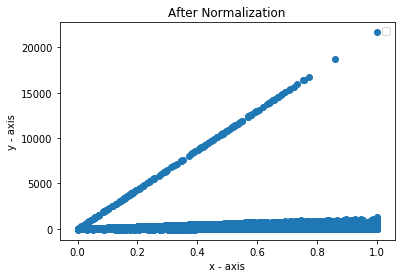

In [20]:
plt.scatter(X, df[features]) 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('After Normalization') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show()


In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(181, 481)

In [41]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf', C=100, gamma=0.5)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.73      1.00      0.84         8

   micro avg       0.86      0.86      0.86        21
   macro avg       0.86      0.88      0.86        21
weighted avg       0.90      0.86      0.86        21



In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8571428571428571

# Hyper Parameter Tunning 

In [58]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 

  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

1, kernel=rbf, score=0.9672131147540983, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ........ C=0.1, gamma=0.01, kernel=rbf, score=0.95, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ........ C=0.1, gamma=0.01, kernel=rbf, score=0.95, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ...... C=0.1, gamma=0.01, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ...... C=0.1, gamma=0.01, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ...... C=0.1, gamma=0.01, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.5081967213114754, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, ga

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

# SequentialFeatureSelector (Acoustic features + Glottal features + PCA)

<img src="sequentialModelDiagram.png">

In [46]:
df = pd.read_csv('../DAta/DataMerge.csv')

df.fillna(0, inplace=True)

df.head()
df.size

97768

In [47]:
df.head()

,Unnamed: 0,frameTime,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,...,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29
0,0,0,0.010374,0.000102,0.010271,82,149,0.002477,-3.260000e-06,0.002743,...,0.1310,-0.468,0.03930,-0.0459,-0.194,-0.483,-0.254,-0.4790,-0.229,0.0528
1,1,0,0.008003,0.000108,0.007896,88,5,0.001813,5.450000e-06,0.001394,...,-0.6930,-0.463,-0.96600,-0.3270,-1.270,0.608,-1.070,0.2550,-0.102,-0.6250
2,2,0,0.011478,0.000100,0.011378,83,194,0.003527,-2.220000e-06,0.003756,...,0.1550,0.183,0.00799,0.0498,-0.139,0.105,-0.026,-0.1480,0.215,0.1590
3,3,0,0.005419,0.000100,0.005319,109,206,0.001289,4.160000e-07,0.001246,...,0.0493,-0.421,-0.62400,-0.2580,-0.472,-0.738,0.144,-0.0845,-0.556,0.1020
4,4,0,0.011950,0.000100,0.011850,79,31,0.002273,9.090000e-06,0.001574,...,0.3230,0.272,-0.20700,0.1250,0.472,-0.502,0.620,0.0931,0.186,0.1170


In [49]:
columns = df.columns.tolist()

features = [f for f in filter(lambda x: x not in ['label', 'frameTime','filename'], columns)]
target = ['label']

feature_df = df[features]

X = np.asarray(feature_df)

y = np.asarray(df['label'])


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [52]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(feature_df, df['label'], test_size=0.1, random_state=4)

X_train.shape

(181, 481)

In [53]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC 
classifier = SVC(gamma='auto', C=10)
# Sequential Forward Selection(sfs)
feature_selector = SFS(SVC(kernel='rbf', gamma="auto"),
           k_features=20,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [54]:
feature_selector.fit(X_train, y_train)
feature_selector.k_feature_idx_  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 481 out of 481 | elapsed:    4.9s finished

[2020-11-24 08:38:57] Features: 1/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    6.1s finished

[2020-11-24 08:39:04] Features: 2/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 479 out of 479 | elapsed:    6.1s finished

[2020-11-24 08:39:10] Features: 3/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19, 20, 22, 23, 24, 30)

In [55]:
filtered_features= df[features].columns[list(feature_selector.k_feature_idx_)]
filtered_features

Index(['Unnamed: 0', 'pcm_RMSenergy_sma_max', 'pcm_RMSenergy_sma_min',
       'pcm_RMSenergy_sma_range', 'pcm_RMSenergy_sma_amean',
       'pcm_RMSenergy_sma_linregc1', 'pcm_RMSenergy_sma_linregc2',
       'pcm_RMSenergy_sma_linregerrQ', 'pcm_RMSenergy_sma_stddev',
       'pcm_RMSenergy_sma_skewness', 'pcm_RMSenergy_sma_kurtosis',
       'pcm_fftMag_mfcc_sma[1]_max', 'pcm_fftMag_mfcc_sma[1]_range',
       'pcm_fftMag_mfcc_sma[1]_amean', 'pcm_fftMag_mfcc_sma[1]_linregc1',
       'pcm_fftMag_mfcc_sma[1]_linregc2', 'pcm_fftMag_mfcc_sma[1]_stddev',
       'pcm_fftMag_mfcc_sma[1]_skewness', 'pcm_fftMag_mfcc_sma[1]_kurtosis',
       'pcm_fftMag_mfcc_sma[2]_amean'],
      dtype='object')

In [56]:
from sklearn import svm


classifier = svm.SVC(kernel='rbf',gamma="auto")

classifier.fit(X_train[filtered_features], y_train)

y_predict = classifier.predict(X_test[filtered_features])

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.73      1.00      0.84         8

   micro avg       0.86      0.86      0.86        21
   macro avg       0.86      0.88      0.86        21
weighted avg       0.90      0.86      0.86        21



In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8571428571428571